In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data, print_param_count, plot_training_epochs
from src.models import *
from src.trainer import Trainer

In [2]:
# Train siamese network without aux loss

# Can use any network with ten output nodes here
le_net = LeNet()

# Can use any network with ten input and two output nodes here
linear = nn.Linear(20, 2)

nb_epochs = 25
n_cv = 10

train_losses = []
train_accuracies = []
validation_accuracies = []
test_accuracies = []

In [3]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    print('cv iter', i)
    siamese_le_net = Siamese(le_net, target=linear, weight_aux=0., strategy="sum",
                            softmax=False, argmax=False)
    trainer = Trainer(nb_epochs=nb_epochs, run="conv_no_aux")

    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, 
                           return_acc=True)
    test_accuracies.append(acc_test)

cv iter 0
# Epoch 1/25:	 loss=0.61	 loss_val=0.46	 acc_val=77.68
# Epoch 2/25:	 loss=0.4	 loss_val=0.41	 acc_val=82.14
# Epoch 3/25:	 loss=0.3	 loss_val=0.34	 acc_val=83.93
# Epoch 4/25:	 loss=0.26	 loss_val=0.42	 acc_val=83.48
# Epoch 5/25:	 loss=0.22	 loss_val=0.36	 acc_val=85.27
# Epoch 6/25:	 loss=0.15	 loss_val=0.4	 acc_val=83.93
# Epoch 7/25:	 loss=0.09	 loss_val=0.45	 acc_val=83.93
# Epoch 8/25:	 loss=0.06	 loss_val=0.53	 acc_val=83.48
# Epoch 9/25:	 loss=0.03	 loss_val=0.67	 acc_val=82.59
# Epoch 10/25:	 loss=0.01	 loss_val=0.64	 acc_val=84.38
# Epoch 11/25:	 loss=0.01	 loss_val=0.67	 acc_val=83.04
# Epoch 12/25:	 loss=0.0	 loss_val=0.74	 acc_val=83.04
# Epoch 13/25:	 loss=0.0	 loss_val=0.76	 acc_val=83.93
# Epoch 14/25:	 loss=0.0	 loss_val=0.76	 acc_val=84.38
# Epoch 15/25:	 loss=0.0	 loss_val=0.78	 acc_val=83.48
# Epoch 16/25:	 loss=0.0	 loss_val=0.8	 acc_val=83.48
# Epoch 17/25:	 loss=0.0	 loss_val=0.81	 acc_val=83.48
# Epoch 18/25:	 loss=0.0	 loss_val=0.83	 acc_val=83.48
# 

# Epoch 22/25:	 loss=0.0	 loss_val=0.75	 acc_val=87.95
# Epoch 23/25:	 loss=0.0	 loss_val=0.76	 acc_val=87.95
# Epoch 24/25:	 loss=0.0	 loss_val=0.76	 acc_val=87.95
# Epoch 25/25:	 loss=0.0	 loss_val=0.77	 acc_val=87.95
loss_test=0.62	 acc_test=87.79
cv iter 6
# Epoch 1/25:	 loss=0.76	 loss_val=0.6	 acc_val=86.61
# Epoch 2/25:	 loss=0.24	 loss_val=0.54	 acc_val=85.27
# Epoch 3/25:	 loss=0.13	 loss_val=0.51	 acc_val=84.38
# Epoch 4/25:	 loss=0.08	 loss_val=0.47	 acc_val=87.05
# Epoch 5/25:	 loss=0.05	 loss_val=0.53	 acc_val=85.71
# Epoch 6/25:	 loss=0.03	 loss_val=0.51	 acc_val=87.5
# Epoch 7/25:	 loss=0.01	 loss_val=0.54	 acc_val=86.61
# Epoch 8/25:	 loss=0.01	 loss_val=0.58	 acc_val=87.5
# Epoch 9/25:	 loss=0.01	 loss_val=0.59	 acc_val=87.05
# Epoch 10/25:	 loss=0.01	 loss_val=0.62	 acc_val=87.05
# Epoch 11/25:	 loss=0.0	 loss_val=0.63	 acc_val=86.61
# Epoch 12/25:	 loss=0.0	 loss_val=0.64	 acc_val=87.05
# Epoch 13/25:	 loss=0.0	 loss_val=0.67	 acc_val=87.5
# Epoch 14/25:	 loss=0.0	 l

In [4]:
import numpy as np 
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)
print(train_losses.shape)
print(train_accuracies.shape)
print(validation_accuracies.shape)

(25,)
(25,)
(25,)


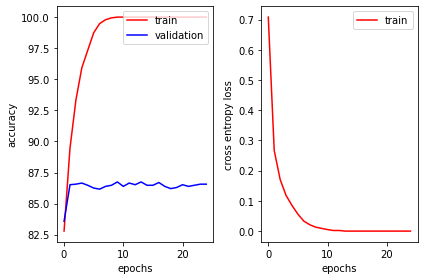

In [5]:
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies, validation_accuracies)

In [6]:
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev test acc', stdev_test_acc)

avg test acc 85.976
stdev test acc 1.4155790334700487
